In [1]:
import os

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import tensorflow as tf

In [5]:
import matplotlib.pyplot as plt

In [6]:
from tensorflow import keras

In [7]:
from tensorflow.keras import layers

In [8]:
data=pd.read_csv("./kc_house_data.csv")

In [9]:
data.shape

(21613, 21)

In [10]:
pd.options.display.max_columns=25

In [11]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
data.dtypes # date is string type

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [13]:
data['year']=pd.to_numeric(data['date'].str.slice(0,4))

In [14]:
data['month']=pd.to_numeric(data['date'].str.slice(4,6))

In [15]:
data['day']=pd.to_numeric(data['date'].str.slice(6,8))

In [16]:
data.drop(['id'],axis="columns",inplace=True)

In [17]:
data.drop(['date'],axis="columns",inplace=True)

In [18]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [19]:
data_num=data.shape[0]

In [20]:
data_num

21613

In [21]:
indexes=np.random.permutation(data_num)

In [22]:
indexes

array([ 2743, 12057,  9038, ..., 13806,  2382,  8164])

In [23]:
#train:validation:test=6:2:2

In [24]:
train_indexes=indexes[:int(data_num*0.6)]

In [25]:
train_indexes

array([ 2743, 12057,  9038, ..., 17198,  1743, 11027])

In [26]:
val_indexes=indexes[int(data_num*0.6):int(data_num*0.8)]

In [27]:
test_indexes=indexes[int(data_num*0.8):]

In [28]:
#take out data via index 

In [29]:
train_data=data.iloc[train_indexes]

In [30]:
train_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
2743,388000.0,4,2.50,2560,5800,2.0,0,0,3,9,2560,0,2005,0,98038,47.3474,-122.025,3040,5800,2015,1,8
12057,500000.0,4,2.50,1770,8155,1.5,0,0,4,6,1770,0,1970,1993,98034,47.7190,-122.173,1460,7360,2015,5,5
9038,397990.0,3,1.00,1180,11862,1.0,0,0,4,7,1180,0,1948,0,98177,47.7153,-122.363,1540,8100,2014,6,12
5843,616000.0,4,1.75,1700,5846,1.0,0,0,3,8,1700,0,1957,0,98199,47.6539,-122.408,1480,5177,2014,7,1
16149,533000.0,3,2.50,2810,4607,2.0,0,0,3,8,2810,0,2004,0,98011,47.7735,-122.227,2540,4871,2014,10,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15129,937750.0,4,2.75,2580,3560,1.5,0,0,5,7,1710,870,1917,0,98115,47.6753,-122.304,1980,3800,2015,3,27
5113,800000.0,3,2.50,1630,2640,2.0,0,0,5,8,1630,0,1919,0,98119,47.6452,-122.371,1630,3000,2014,7,16
17198,305000.0,3,2.00,1490,7697,1.0,0,0,3,7,1490,0,1994,0,98059,47.4852,-122.164,1540,7529,2014,8,21
1743,508000.0,4,2.25,3320,53392,2.0,0,0,4,8,2000,1320,1986,0,98027,47.4724,-122.014,3230,43129,2014,10,14


In [31]:
val_data=data.iloc[val_indexes]

In [32]:
test_data=data.iloc[test_indexes]

In [33]:
# normalization

In [34]:
train_validation_data=pd.concat([train_data,val_data])

In [35]:
mean=train_validation_data.mean()

In [36]:
std=train_validation_data.std()

In [37]:
train_data=(train_data-mean)/std

In [38]:
val_data=(val_data-mean)/std

In [39]:
# Numpy array training & validation data

In [40]:
x_train=np.array(train_data.drop('price',axis='columns'))

In [41]:
y_train=np.array(train_data['price'])

In [42]:
x_val=np.array(val_data.drop('price',axis='columns'))

In [43]:
y_val=np.array(val_data['price'])

In [44]:
x_train.shape

(12967, 21)

In [45]:
# build model

In [46]:
model=keras.Sequential(name='model-1') # no space between ' and m

In [47]:
model.add(layers.Dense(64,activation='relu',input_shape=(21,)))

In [48]:
# 21種特徵,21個資料維度

In [49]:
model.add(layers.Dense(64,activation='relu'))

In [50]:
model.add(layers.Dense(1))

In [51]:
model.summary() # 1408=21*64+64,4160=64*64+64,65=64*1+1

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1408      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(keras.optimizers.Adam(0.001),loss=keras.losses.MeanSquaredError(),metrics=[keras.metrics.MeanAbsoluteError()])

In [53]:
model_dir='lab2-logs\models'

In [54]:
os.makedirs(model_dir)

In [55]:
log_dir=os.path.join('lab2-logs','model-1')

In [56]:
model_cbk=keras.callbacks.TensorBoard(log_dir=log_dir)

In [57]:
model_mckp=keras.callbacks.ModelCheckpoint(model_dir + '\Best-model-1.h5',
                                           monitor='val_mean_absolute_error',
                                           save_best_only=True,
                                           mode='min')

In [58]:
history=model.fit(x_train,y_train,batch_size=64,epochs=300,validation_data=(x_val,y_val),callbacks=[model_cbk,model_mckp])

Epoch 1/300
  1/203 [..............................] - ETA: 0s - loss: 1.1695 - mean_absolute_error: 0.6867WARNING:tensorflow:From C:\Users\asus\tf2-gpu\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
203/203 [==============================] - 1s 5ms/step - loss: 0.3364 - mean_absolute_error: 0.3414 - val_loss: 0.2129 - val_mean_absolute_error: 0.2870
Epoch 2/300
203/203 [==============================] - 1s 3ms/step - loss: 0.1968 - mean_absolute_error: 0.2776 - val_loss: 0.1854 - val_mean_absolute_error: 0.2632
Epoch 3/300
203/203 [==============================] - 1s 3ms/step - loss: 0.1746 - mean_absolute_error: 0.2590 - val_loss: 0.1876 - val_mean_absolute_error: 0.2625
Epoch 4/300
203/203 [==============================] - 1s 2ms/step - loss: 0.1560 - mean_absolute_error: 0.2443 - val_loss: 0.1664 

203/203 [==============================] - 0s 2ms/step - loss: 0.0589 - mean_absolute_error: 0.1668 - val_loss: 0.1259 - val_mean_absolute_error: 0.2074
Epoch 46/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0567 - mean_absolute_error: 0.1638 - val_loss: 0.1345 - val_mean_absolute_error: 0.2086
Epoch 47/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0554 - mean_absolute_error: 0.1623 - val_loss: 0.1262 - val_mean_absolute_error: 0.2055
Epoch 48/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0544 - mean_absolute_error: 0.1614 - val_loss: 0.1268 - val_mean_absolute_error: 0.2082
Epoch 49/300
203/203 [==============================] - 0s 2ms/step - loss: 0.0558 - mean_absolute_error: 0.1628 - val_loss: 0.1188 - val_mean_absolute_error: 0.2067
Epoch 50/300
203/203 [==============================] - 0s 2ms/step - loss: 0.0541 - mean_absolute_error: 0.1611 - val_loss: 0.1388 - val_mean_absolute_error: 0.2143
Epoch 51/300
203/

203/203 [==============================] - 0s 2ms/step - loss: 0.0398 - mean_absolute_error: 0.1442 - val_loss: 0.1394 - val_mean_absolute_error: 0.2149
Epoch 95/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0443 - mean_absolute_error: 0.1494 - val_loss: 0.1416 - val_mean_absolute_error: 0.2169
Epoch 96/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0424 - mean_absolute_error: 0.1464 - val_loss: 0.1320 - val_mean_absolute_error: 0.2146
Epoch 97/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0399 - mean_absolute_error: 0.1437 - val_loss: 0.1379 - val_mean_absolute_error: 0.2198
Epoch 98/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0390 - mean_absolute_error: 0.1426 - val_loss: 0.1417 - val_mean_absolute_error: 0.2157
Epoch 99/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0394 - mean_absolute_error: 0.1435 - val_loss: 0.1406 - val_mean_absolute_error: 0.2175
Epoch 100/300
203

203/203 [==============================] - 0s 1ms/step - loss: 0.0346 - mean_absolute_error: 0.1358 - val_loss: 0.1386 - val_mean_absolute_error: 0.2163
Epoch 144/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0343 - mean_absolute_error: 0.1348 - val_loss: 0.1369 - val_mean_absolute_error: 0.2148
Epoch 145/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0350 - mean_absolute_error: 0.1346 - val_loss: 0.1369 - val_mean_absolute_error: 0.2196
Epoch 146/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0337 - mean_absolute_error: 0.1343 - val_loss: 0.1276 - val_mean_absolute_error: 0.2125
Epoch 147/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0321 - mean_absolute_error: 0.1315 - val_loss: 0.1387 - val_mean_absolute_error: 0.2155
Epoch 148/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0310 - mean_absolute_error: 0.1302 - val_loss: 0.1334 - val_mean_absolute_error: 0.2147
Epoch 149/30

203/203 [==============================] - 0s 2ms/step - loss: 0.0289 - mean_absolute_error: 0.1262 - val_loss: 0.1451 - val_mean_absolute_error: 0.2193
Epoch 193/300
203/203 [==============================] - 0s 2ms/step - loss: 0.0290 - mean_absolute_error: 0.1268 - val_loss: 0.1446 - val_mean_absolute_error: 0.2188
Epoch 194/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0281 - mean_absolute_error: 0.1248 - val_loss: 0.1382 - val_mean_absolute_error: 0.2180
Epoch 195/300
203/203 [==============================] - 0s 2ms/step - loss: 0.0294 - mean_absolute_error: 0.1271 - val_loss: 0.1344 - val_mean_absolute_error: 0.2171
Epoch 196/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0373 - mean_absolute_error: 0.1369 - val_loss: 0.1400 - val_mean_absolute_error: 0.2195
Epoch 197/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0317 - mean_absolute_error: 0.1302 - val_loss: 0.1472 - val_mean_absolute_error: 0.2187
Epoch 198/30

203/203 [==============================] - 0s 2ms/step - loss: 0.0285 - mean_absolute_error: 0.1239 - val_loss: 0.1389 - val_mean_absolute_error: 0.2183
Epoch 242/300
203/203 [==============================] - 0s 2ms/step - loss: 0.0274 - mean_absolute_error: 0.1234 - val_loss: 0.1472 - val_mean_absolute_error: 0.2226
Epoch 243/300
203/203 [==============================] - 0s 2ms/step - loss: 0.0266 - mean_absolute_error: 0.1218 - val_loss: 0.1412 - val_mean_absolute_error: 0.2207
Epoch 244/300
203/203 [==============================] - 0s 2ms/step - loss: 0.0263 - mean_absolute_error: 0.1216 - val_loss: 0.1448 - val_mean_absolute_error: 0.2248
Epoch 245/300
203/203 [==============================] - 0s 2ms/step - loss: 0.0261 - mean_absolute_error: 0.1210 - val_loss: 0.1385 - val_mean_absolute_error: 0.2219
Epoch 246/300
203/203 [==============================] - 0s 2ms/step - loss: 0.0271 - mean_absolute_error: 0.1232 - val_loss: 0.1461 - val_mean_absolute_error: 0.2275
Epoch 247/30

203/203 [==============================] - 0s 2ms/step - loss: 0.0271 - mean_absolute_error: 0.1219 - val_loss: 0.1489 - val_mean_absolute_error: 0.2256
Epoch 291/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0273 - mean_absolute_error: 0.1229 - val_loss: 0.1421 - val_mean_absolute_error: 0.2231
Epoch 292/300
203/203 [==============================] - 0s 2ms/step - loss: 0.0253 - mean_absolute_error: 0.1190 - val_loss: 0.1397 - val_mean_absolute_error: 0.2214
Epoch 293/300
203/203 [==============================] - 0s 2ms/step - loss: 0.0247 - mean_absolute_error: 0.1179 - val_loss: 0.1447 - val_mean_absolute_error: 0.2213
Epoch 294/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0251 - mean_absolute_error: 0.1190 - val_loss: 0.1633 - val_mean_absolute_error: 0.2293
Epoch 295/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0253 - mean_absolute_error: 0.1198 - val_loss: 0.1439 - val_mean_absolute_error: 0.2232
Epoch 296/30

In [59]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

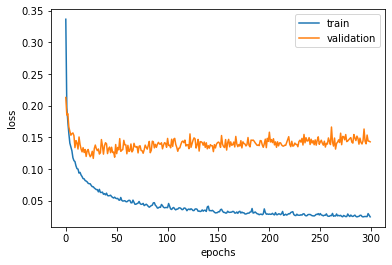

In [60]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

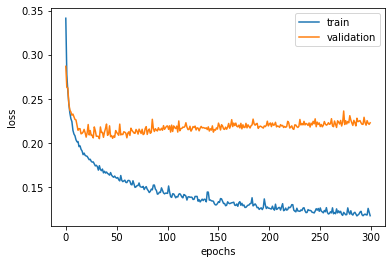

In [61]:
plt.plot(history.history['mean_absolute_error'],label='train')
plt.plot(history.history['val_mean_absolute_error'],label='validation')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

In [62]:
model.load_weights('lab2-logs/models/Best-model-1.h5')

In [63]:
y_test=np.array(test_data['price'])

In [64]:
y_test

array([660000., 450000., 599950., ..., 325000., 400000., 186000.])

In [65]:
test_data=(test_data-mean)/std

In [66]:
#y_test=np.array(test_data['price'])

In [67]:
#y_test

In [68]:
x_test=np.array(test_data.drop('price',axis='columns'))

In [69]:
y_pred=model.predict(x_test)

In [70]:
y_pred

array([[ 0.21232323],
       [ 0.17323188],
       [-0.09894173],
       ...,
       [-0.64640576],
       [-0.5788326 ],
       [-1.0032144 ]], dtype=float32)

In [71]:
y_pred=np.reshape(y_pred*std['price']+mean['price'],y_test.shape)

In [72]:
percentage_error=np.mean(np.abs(y_test-y_pred))/np.mean(y_test) * 100

In [73]:
print("Model_1 Percentage Error:{:.2f}%".format(percentage_error))

Model_1 Percentage Error:14.14%
